In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression


# Gradient descent

## Batch Gradient Descent



$$
\hat{y} = \sum_{j=0}^{n} \theta_j x_j
$$

Where there are $n$ features, $\theta_j$ are the model parameters and $x_j$ are the feature values. $\theta_0$ is the intercept, and $x_0$ should always be 1

Equivalently:

$$
\hat{y} = \bm{\theta} \cdot \bm{x}
$$

For data entries indexed by $i$ and a training set $\bm{X}$, the MSE is:

$$
MSE(\bm{X}, \bm{\theta}) = \sum_{i=1}^{m}(\bm{\theta} \cdot \bm{x}^{(i)}-y^{(i)})
$$

This is minimised by the normal equation:

$$
\hat{\bm{\theta}} = (\bm{X}^\intercal\bm{X})^{-1} \bm{X}^\intercal \bm{y}
$$

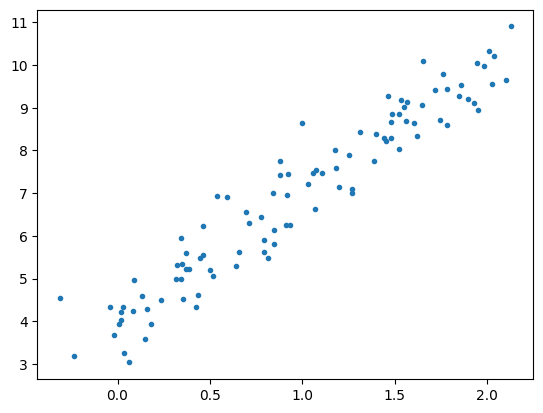

In [2]:
# sample data
np.random.seed(42)

m=100

# we want column vectors
X = np.linspace(0., 2., m).reshape((m, 1)) + np.random.normal(0., 0.3, size=(m, 1))
y = 4. + 3.*X + np.random.normal(0., 0.6, size=(m, 1))

plt.scatter(X, y, marker = ".")

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0=1 since we want an intercept predictor

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

theta_best

array([[4.05642374],
       [2.95557499]])

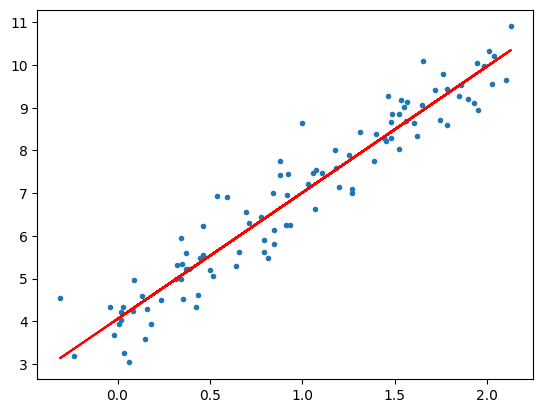

In [4]:
plt.scatter(X, y, marker = ".")
plt.plot(X, X_b @ theta_best, "r-")

In [5]:
# using sklearn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

# can predict in usual way, lin_reg.predict(X_test)

(array([4.05642374]), array([[2.95557499]]))

Lin reg is very slow for a large number of training set elements, so instead we can try and iteratively minimize a cost function
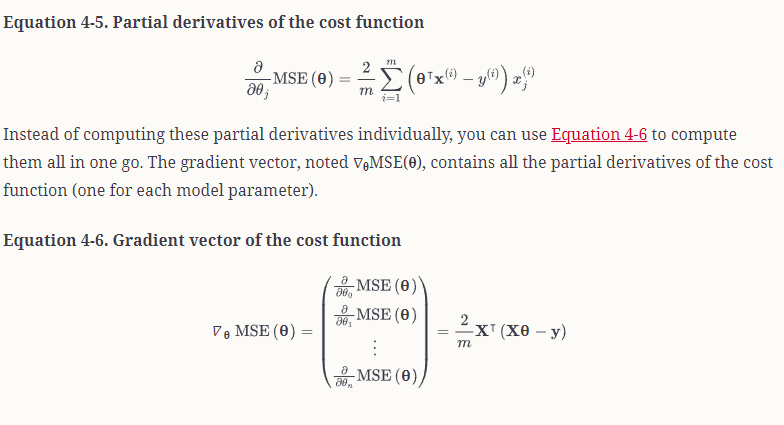

If $\eta$ is the learning rate, then:

$$
\bm{\theta}_{n+1} = \bm{\theta}_n - \eta \nabla_{\bm{\theta}} MSE(\bm{\theta})
$$

In [6]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = ([[-10],[5]])  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.05642374],
       [2.95557499]])

## Stochastic Gradient Descent

Rather than looking at all elements in the training set at each step, we pick a random one. This is faster for models with large training sets

It is also good for skiping over local minima in the cost function

The learning rate is usually decreased over time

In each epoch, we normally do descent on a number of set elements (traditionally $m$, the number of elements in the training set)

We can also do mini-batch gradient descent, which does batch gradient descent on random subsets of the dataset (this can have advantages in hardware-optimised models)

In [7]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000, 
    tol=1e-5, 
    penalty=None,
    eta0 = 0.01,
    n_iter_no_change=100,
    random_state=42)

sgd_reg.fit(X, y.ravel()) # ravel creates a continuous 1D array

sgd_reg.intercept_, sgd_reg.coef_

(array([4.05534042]), array([2.95703313]))

# Polynomial Regression

This can be achieved by adding the square of the data as a feature

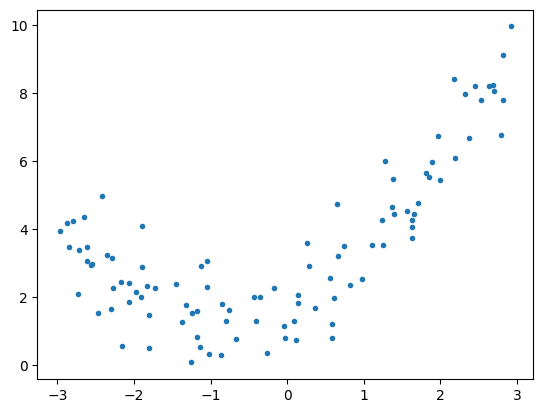

In [8]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y, marker=".")

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

X_poly[:5]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [11]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# Learning Curves

Recall cross-validation - if a model performs well on training data, and poorly on CV data, then it is overfitting. If it performs poorly on both, it is underfitting

We can use a learning curve to see how training error and validation error change as the size of the training set is increased:

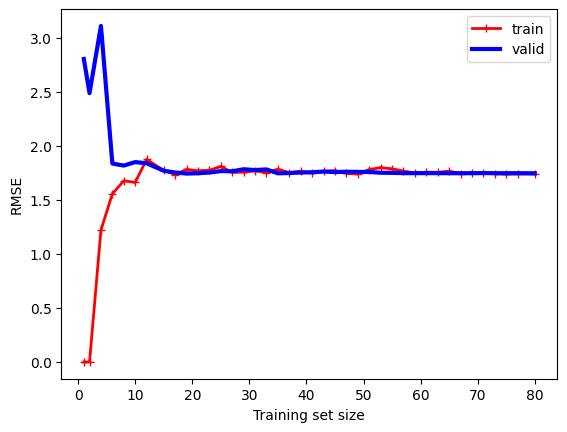

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),
    X,
    y,
    train_sizes=np.linspace(0.01, 1, 40),
    cv=5,
    scoring="neg_root_mean_squared_error",
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()

Model is underfitting, as erros plateau quickly, and are very similar after increasing the training set size a small amount. We can try other degree polynomials:

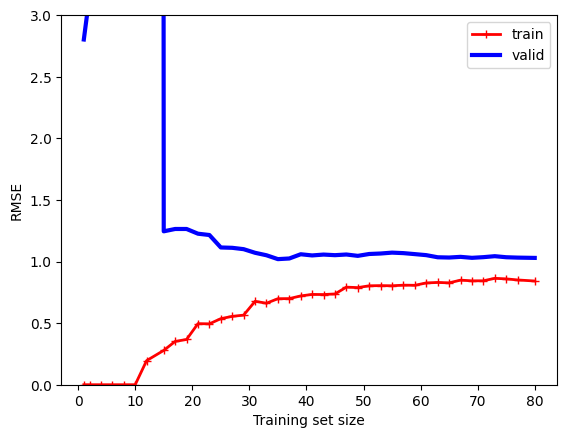

In [17]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression,
    X,
    y,
    train_sizes=np.linspace(0.01, 1, 40),
    cv=5,
    scoring="neg_root_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.ylim((0,3))
plt.legend()

The model now performs significantly better on training data than validation data, suggessting overfitting

## Types of error

There are 3 main types of error, contributing to the generalisation error:
* Bias - error due to incorrect assumptions about the data
* Variance - due to the model's sensitivity to small changes in data. Models with more parameters tend to have a higher variance, and overfit
* Irreducible error - due to noise in data

# Regularization

We can regularize models by reduing the number of degrees of freedom and/or constraining the weights

## Ridge regression

We add a regularization term $\frac{\alpha}{m} \sum_{i=1}^{n}{\theta_i}^2$ to the MSE, forcing learning algo to minimise the parameters

In [19]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [20]:
sgd_reg = SGDRegressor(
    penalty="l2", # use l2 norm
    alpha=0.1 / m, 
    tol=None, 
    max_iter=1000, 
    eta0=0.01, 
    random_state=42
)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

## Lasso regression


Uses $\ell_1$ norm instead. Tends to eliminate weights of least important features well. However, it tends to oscillate around the best parameters, so $\alpha$ should be reduced over time

In [21]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## Elastic net regression

This is a weighted average of lasso and ridge

## Early stopping

For higher dimension models, it can be better to stop training when the validation error reaches a min, to prevent overfitting
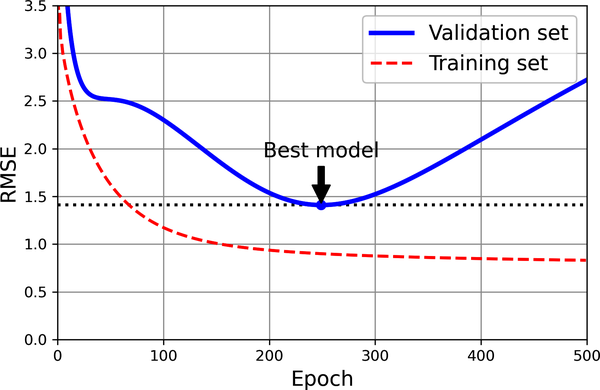

# Logistic Regression

We can use regression to perform classification

We estimate the probability using a sigmoid/logistic function

$$
\hat{p} = \sigma(\bm{\theta}^\intercal \bm{x})
$$

We use a logarithmic loss function, which:
* if the true value is 1, the function is very large if the probability is close to 0, and very small if it is close to 1

* if the true value is 0, the function is very small if the probability is close to 0, and very large if it is close to 1

It has no analytical minimisation, but is convex, so we can use gradient descent

In [24]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

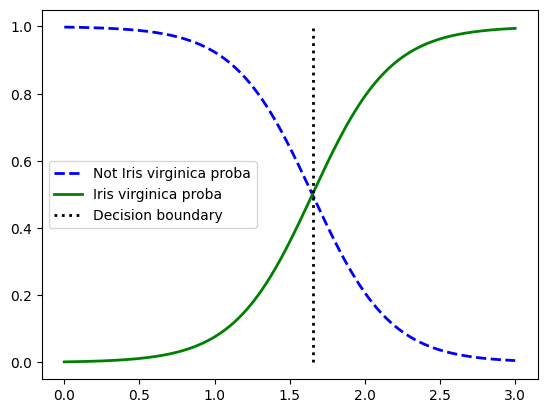

In [28]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")
plt.legend()

In [29]:
log_reg.predict([[1.5], [1.7]])

array([False,  True])

## Softmax Regression

This can be expanded to multiple classes; each class $k$ has its own parameter vector $\bm{\theta}^{(k)}$ which it uses to estimate a probability from a data instance $\bm{x}$.

We first compute the softmax score $s_k(\bm{x}) = \left(\bm{\theta}^{(k)}\right)^\intercal\bm{x}$.

The probability of the data instance being of class k is the exponential of the softmax for class k, divided by the sum of all the softmax functions for all the possible classes:
$$
\hat{p}_k = \frac{\exp{s_k(\bm{x})}}{\sum_{j=1}^K \exp{s_j(\bm{x})}}
$$

This looks a bit like a partition function, and is minimised using the cross-entropy cost function
$$
J = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)}\log{\left(\hat{p}_k^{(i)}\right)}
$$

In [30]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [31]:
softmax_reg.predict([[5, 2]])

array([2])

In [32]:

softmax_reg.predict_proba([[5, 2]]).round(2)


array([[0.  , 0.04, 0.96]])